In [1]:
import pandas as pd
import os


current_dir = os.getcwd()
# Define the file path
file_path = current_dir +"/Data/OilSandsDB/PICKS.xls"

# Read the Excel file into a DataFrame
picks_df= pd.read_excel(file_path)

# Display the first few rows of the DataFrame
picks_df.head()

,SitID,HorID,Pick,Quality
0,102496,1000,321,1
1,102496,2000,,-1
2,102496,3000,,-1
3,102496,4000,,-1
4,102496,5000,438,2


Above is all of the picks for all of the wells. But some of these have poor quality picks and we do not need this much data....

In [2]:
# Identify wells with any pick of quality 3 or 4
wells_with_bad_quality = picks_df[picks_df['Quality'].isin([3, 4])]['SitID'].unique()

print(wells_with_bad_quality)
print(len(wells_with_bad_quality))

[102496 102497 102498 ... 184098 184128 184130]
1585


Lets filter out the wells that have poor quality picks

In [3]:
# Filter out wells with any pick of quality 3 or 4
filtered_picks_df = picks_df[~picks_df['SitID'].isin(wells_with_bad_quality)]

# Display the filtered DataFrame
print(filtered_picks_df.head())

# Print the number of unique wells left after filtering
print(len(filtered_picks_df['SitID'].unique()))

      SitID  HorID      Pick  Quality
196  102583   1000       336        1
197  102583   2000                 -1
198  102583   3000                 -1
199  102583   4000                 -1
200  102583   5000       446        1
608


Now lets see how many missing picks are in each well. There are 15 formations, and there is a missing pick or good pick for these wells 

In [4]:
# Filter the DataFrame to get only the rows where Quality is 0, 1, or 2
good_picks_df = filtered_picks_df[filtered_picks_df['Quality'].isin([0, 1, 2])]

# Count the number of good picks per well
good_picks_per_well = good_picks_df.groupby('SitID').size()

print(good_picks_per_well)

SitID
102583    10
102597    10
102671    10
102698    10
102710    10
          ..
178525    12
178601    10
179250    12
179268    13
183487    11
Length: 608, dtype: int64


Now lets plot it

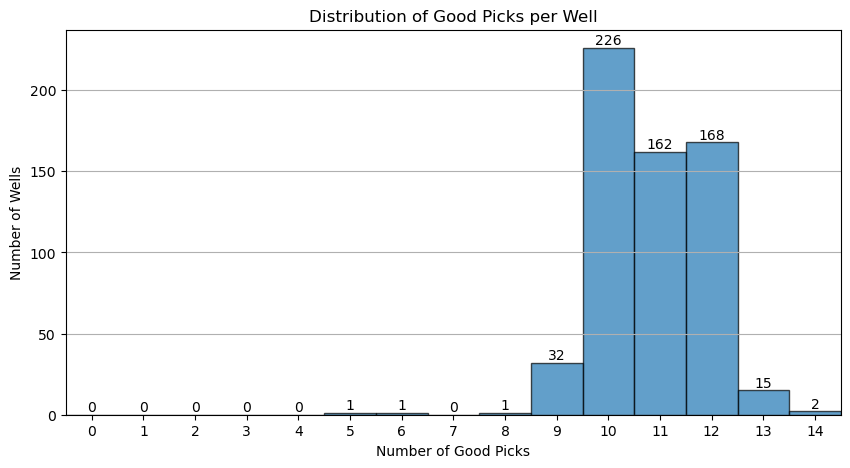

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bins based on the range of good picks and ensuring each bin is 1 pick wide
max_picks = int(np.max(good_picks_per_well))
bins = np.arange(0, max_picks + 2) - 0.5

# Plotting
plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(good_picks_per_well, bins=bins, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Good Picks')
plt.ylabel('Number of Wells')
plt.title('Distribution of Good Picks per Well')
plt.grid(True, which='both', axis='y')  # Only display the horizontal grid lines

# Adjust x-ticks for clarity
plt.xticks(np.arange(0, max_picks + 1))
plt.xlim([-0.5, max_picks + 0.5])  # Adjust x limits for better visualization

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Add counts above the bars
for count, bin_center in zip(counts, bin_centers):
    plt.text(bin_center, count + 2, str(int(count)), 
             ha='center', color='k')

plt.show()


We can see in this plot that only 2 wells have all of the picks. For the sake of ease lets find the wells that have the least amount of missing picks. Lets pick wells that have Greater than 12 good picks

In [6]:
# Get the SitID values for wells with more than 11 good quality picks
wells_with_good_picks = good_picks_per_well[good_picks_per_well > 11].index

# Filter the original DataFrame
filtered_picks_df = picks_df[picks_df['SitID'].isin(wells_with_good_picks)]


num_wells = filtered_picks_df['SitID'].nunique()
print(num_wells)


185


Now we need to find out what .las files to extract from the data. The .las files are the UWI of the well (unique well identifier). There is a Well.xls file that tells us the UWI for each well which we can in turn use to extract the .las files 

In [7]:
# Define the file path
file_path = current_dir +"/Data/OilSandsDB/WELLS.xls"

# Read the Excel file into a DataFrame
wells_df= pd.read_excel(file_path)
print(wells_df.head())

    SitID      UWI (AGS)                  UWI
0  102496  0674010812000  00/12-08-067-01W4/0
1  102497  0674020807000  00/07-08-067-02W4/0
2  102498  0674021109000  00/09-11-067-02W4/0
3  102500  0674022910000  00/10-29-067-02W4/0
4  102501  0674023406000  00/06-34-067-02W4/0


In [8]:
merged_df = pd.merge(filtered_picks_df, wells_df, on='SitID', how='left')

# 3. Extract the UWI values for the merged data
uwis = merged_df['UWI'].unique()

print(len(uwis))
print(uwis)

185
['00/07-25-076-26W4/0' '00/10-25-076-02W5/0' '00/16-12-076-03W5/0'
 '00/10-28-076-04W5/0' '00/10-34-077-24W4/0' '00/11-30-077-25W4/0'
 '00/11-34-077-25W4/0' '00/06-02-077-26W4/0' '00/07-22-077-26W4/0'
 '00/11-34-077-26W4/0' '00/06-24-077-01W5/0' '00/07-09-077-04W5/0'
 '00/07-12-077-04W5/0' '00/11-32-077-05W5/0' '00/10-19-078-24W4/0'
 '00/10-20-078-24W4/0' '00/06-25-078-25W4/0' '00/10-21-078-26W4/0'
 '00/07-11-078-02W5/0' 'AA/12-29-079-22W4/0' '00/07-01-079-24W4/0'
 '00/10-06-079-24W4/0' '00/07-16-079-24W4/0' '00/11-18-079-03W5/0'
 '00/02-30-079-04W5/0' '00/10-18-080-20W4/0' '00/11-09-080-21W4/0'
 '00/04-01-080-22W4/0' '00/01-32-080-22W4/0' 'AA/11-01-080-23W4/0'
 '00/13-31-080-23W4/0' '00/10-18-080-25W4/0' '00/10-15-081-19W4/0'
 'AA/11-14-081-20W4/0' '00/10-18-081-20W4/0' '00/10-23-081-20W4/0'
 'AA/13-06-081-21W4/0' '00/13-10-081-21W4/0' '00/07-21-081-21W4/0'
 '00/06-08-081-22W4/0' '00/07-20-081-22W4/0' '00/10-07-081-24W4/0'
 '00/11-10-081-25W4/0' '00/11-12-081-25W4/0' '00/10-24-081

In [9]:
import lasio

def read_las_file_to_dataframe(file_path) ->pd.DataFrame:
    """
    Read a .las file into a Pandas DataFrame using lasio.
    
    Parameters:
    - file_path: str, path to the .las file
    
    Returns:
    - Pandas DataFrame containing the well log data from the .las file
    """
    las = lasio.read(file_path)
    return las.df()

In [10]:
def convert_las_to_uwi_format(las_name):
    no_extension = las_name.replace('.las', '')
    split_name = no_extension.split('-')
    formatted_name = split_name[0] + '/' + '-'.join(split_name[1:-1]) + '/' + split_name[-1]
    return formatted_name


In the SPE paper they suggest having gamma-ray (GR), resistivity(ILD) and density logs (RHOB). There are only 14 wells of the 185 filtered wells that have all three. So as a replacment we will use the density porosity log (DPHI) that also has a reaction to top formations. 

In [11]:
import os

# Modify the format of the UWI values to match the .las file names
modified_uwis = [uwi.replace('/', '-') + '.las' for uwi in uwis]

# Directory containing the .las files
logs_directory = current_dir+"/Data/OilSandsDB/Logs"

# List to store dataframes read from .las files
las_dataframes = []
excluded_las = []
missing_las = []
for uwi in modified_uwis:
    file_path = os.path.join(logs_directory, uwi)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Here you can use the appropriate .las reader to convert the .las file to a dataframe
        # I'll use a placeholder function called read_las_file_to_dataframe which you might need to replace
        df = read_las_file_to_dataframe(file_path)
        # Check if the dataframe contains all the required curves
        required_curves = ['GR', 'ILD', 'DPHI']
        if all(curve in df.columns for curve in required_curves):
            df = df[required_curves]
            df['uwi']= convert_las_to_uwi_format(uwi)
            las_dataframes.append(df)
        else:
            excluded_las.append(uwi)
    else:
        missing_las.append(uwi)

print(len(las_dataframes))

156


Looks like we have some missing .las files and some .las files that do not have the required log curves. Thats okay we will let them go but we need to take them out of filtered_picks_df

In [12]:
print(len(excluded_las))
print(len(missing_las))

all_excluded_las = missing_las + excluded_las

formatted_missing_wells = [convert_las_to_uwi_format(well) for well in all_excluded_las]

# Find the corresponding SitID for these UWIs from the wells_df
missing_sitids = wells_df[wells_df['UWI'].isin(formatted_missing_wells)]['SitID'].tolist()

# Filter out these wells from filtered_picks_df
filtered_picks_df = filtered_picks_df[~filtered_picks_df['SitID'].isin(missing_sitids)]

num_wells = filtered_picks_df['SitID'].nunique()

print(num_wells)

27
2
156


In [13]:
print(len(las_dataframes))
print(las_dataframes[0].head())
print(filtered_picks_df.head())
print(wells_df.head())

156
             GR    ILD   DPHI                  uwi
DEPT                                              
550.00  108.212  2.097  0.243  00/16-12-076-03W5/0
550.25  113.444  2.154  0.235  00/16-12-076-03W5/0
550.50  107.589  2.188  0.243  00/16-12-076-03W5/0
550.75  103.744  2.223  0.250  00/16-12-076-03W5/0
551.00  106.282  2.228  0.244  00/16-12-076-03W5/0
        SitID  HorID      Pick  Quality
10794  110055   1000       554        1
10795  110055   2000                 -1
10796  110055   3000                 -1
10797  110055   4000       701        1
10798  110055   5000     733.5        1
    SitID      UWI (AGS)                  UWI
0  102496  0674010812000  00/12-08-067-01W4/0
1  102497  0674020807000  00/07-08-067-02W4/0
2  102498  0674021109000  00/09-11-067-02W4/0
3  102500  0674022910000  00/10-29-067-02W4/0
4  102501  0674023406000  00/06-34-067-02W4/0


Now we have Data that shows the log information and uwi. We need to convert the uwi to the sitID using the wells_df, then from the filtered_picks_df apply the picks at the correct depths

In [14]:
mapping = wells_df.set_index('UWI')['SitID'].to_dict()  # Create a mapping of UWI to SitID

for las_df in las_dataframes:
    las_df['SitID'] = las_df['uwi'].map(mapping)  # Replace UWI with SitID using the mapping
    las_df.drop(columns=['uwi'], inplace=True)  # Drop the UWI column

print(las_dataframes[1].head())

             GR    ILD   DPHI   SitID
DEPT                                 
463.296  54.880  3.509  0.193  110062
463.546  49.705  3.365  0.197  110062
463.796  43.357  3.151  0.179  110062
464.046  40.856  2.854  0.211  110062
464.296  40.907  2.590  0.244  110062


In [15]:

# Exclude rows where 'Pick' column has empty strings or NaN values
picks_df = filtered_picks_df[filtered_picks_df['Pick'].str.strip() != '']
picks_df = picks_df.dropna(subset=['Pick'])


# Create a dictionary of SitID to a list of pick depths
pick_dict = picks_df.groupby('SitID')['Pick'].apply(list).to_dict()

def is_pick_nearby(depth, next_depth, pick_depths):
    """
    Check if there is a pick depth that falls between the current depth and the next depth.
    """
    for pick_depth in pick_depths:
        # Ensure pick_depth is a float
        if depth <= pick_depth < next_depth:
            return 1
    return 0

def apply_picks_for_well(df):
    picks_for_this_well = pick_dict.get(df['SitID'].iloc[0], [])
    picks_column = []
    
    # Iterate over the depths to get next depth and apply check
    depths = df.index.tolist()
    for i in range(len(depths)-1):
        current_depth = depths[i]
        next_depth = depths[i+1]
        picks_column.append(is_pick_nearby(current_depth, next_depth, picks_for_this_well))
    picks_column.append(0)  # for the last depth value
    
    df['Pick'] = picks_column
    return df

for las_df in las_dataframes:
    apply_picks_for_well(las_df)



In [16]:
for las_df in las_dataframes:
    name = current_dir + "/Data/Well Log Data/" +str(las_df['SitID'].iloc[0]) + ".csv"
    las_df.to_csv(name, index = True)

In [17]:
print(las_dataframes[0].columns)

Index(['GR', 'ILD', 'DPHI', 'SitID', 'Pick'], dtype='object')
